In [1]:
import pandas as pd
import os
import seaborn as sns

# KPI 1: Average update of an agent over one run

### Loading the results


In [2]:
root_dir = os.path.abspath(os.curdir)  # Doesn't work as intended. Needs fix below.
root_dir = root_dir[:-9]
results_dir = root_dir + "/results/"

file_name = "KPI_1_{'NormalUser': 1.0, 'Disinformer': 0.0}.csv"
# file_name = "KPI_1_{'NormalUser': 0.95, 'Disinformer': 0.05}.csv"
# file_name = "KPI_1_{'NormalUser': 0.8, 'Disinformer': 0.2}.csv"
# file_name = "KPI_1_{'NormalUser': 0.25, 'Disinformer': 0.75}.csv"

file_dir = results_dir + file_name

data = pd.read_csv(file_dir)

In [3]:
data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
data.drop(["a", "Replication"], axis=1, inplace=True)
data.head(5)

,"((0.0, <SelectAgentsBy.RANDOM: 0>), True)","((0.0, <SelectAgentsBy.RANDOM: 0>), False)","((0.1, <SelectAgentsBy.RANDOM: 0>), True)","((0.1, <SelectAgentsBy.RANDOM: 0>), False)","((0.25, <SelectAgentsBy.RANDOM: 0>), True)","((0.25, <SelectAgentsBy.RANDOM: 0>), False)","((0.9, <SelectAgentsBy.RANDOM: 0>), True)","((0.9, <SelectAgentsBy.RANDOM: 0>), False)"
0,19.723574,23.570637,20.389372,24.843813,19.338349,24.651997,18.889143,19.503434
1,22.135129,23.103244,19.494468,22.276111,21.123762,22.766638,19.801853,18.779346
2,21.640218,22.712543,21.162514,22.524472,21.202181,23.750364,19.282662,22.693653
3,20.930607,21.517575,18.909560,24.494169,21.671238,23.839116,20.193166,22.603851
4,21.831760,24.076407,19.433550,24.394843,20.951056,24.088286,21.718110,22.289395


In [4]:
# data = data.reset_index(drop=True, inplace=True)
# data = data.set_index("Replication")
# data.head(5)

In [5]:
# Rename columns
# column_names = ["0%_True", "0%_False","0%_True", "0%_False","0%_True", "0%_False","0%_True", "0%_False",]
data.rename({"((0.0, <SelectAgentsBy.RANDOM: 0>), True)":"0%,\nR",
             "((0.0, <SelectAgentsBy.RANDOM: 0>), False)":"0%,\n–",
             "((0.1, <SelectAgentsBy.RANDOM: 0>), True)":"10%,\nR",
             "((0.1, <SelectAgentsBy.RANDOM: 0>), False)":"10%,\n–",
             "((0.25, <SelectAgentsBy.RANDOM: 0>), True)":"25%,\nR",
             "((0.25, <SelectAgentsBy.RANDOM: 0>), False)":"25%,\n–",
             "((0.9, <SelectAgentsBy.RANDOM: 0>), True)":"90%,\nR",
             "((0.9, <SelectAgentsBy.RANDOM: 0>), False)":"90%,\n–"}, axis="columns", inplace=True)


# Switch Columns (first w/o ranking, then w/ranking)
data = data[["0%,\n–", "0%,\nR",
             "10%,\n–", "10%,\nR",
             "25%,\n–", "25%,\nR",
             "90%,\n–", "90%,\nR",]]

# type(data)

In [6]:
type(data.iloc[4,6])

numpy.float64

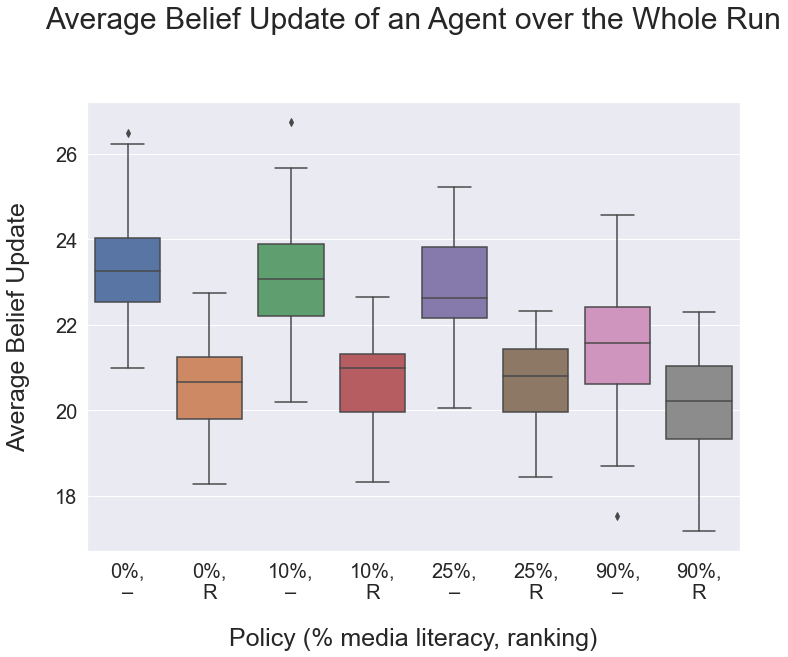

In [7]:
def show_boxplot(df):  # , outliers=False):

    sns.set_theme(style="whitegrid")
    sns.set(rc={'figure.figsize': (11.7, 8.27)})
    ax = sns.boxplot(data=df) #, showfliers=outliers)
    # ax = sns.boxplot(data=df) #, showfliers=outliers)
    # outlier = 'w/' if outliers.any() else 'w/o'

    ax.set_title(f'Average Belief Update of an Agent over the Whole Run', fontsize=30, y=1.15)
    ax.set_ylabel('Average Belief Update', fontsize=25)
    ax.set_xlabel('Policy (% media literacy, ranking)', fontsize=25)
    ax.yaxis.labelpad = 25
    ax.xaxis.labelpad = 25
    ax.tick_params(labelsize=20)


show_boxplot(data)